# American Survey

In [88]:
%matplotlib inline
import pandas as pd
import numpy as np
housing_a = pd.read_csv("data/pums/ss13husa.csv",sep=",",usecols=('ST', 'FINCP'))
housing_b = pd.read_csv("data/pums/ss13husb.csv",sep=",",usecols=('ST', 'FINCP'))
housing = housing_a.append(housing_b)
#population_a = pd.read_csv("data/pums/ss13pusa.csv",sep=",",usecols=(1))
#population_b = pd.read_csv("data/pums/ss13pusb.csv",sep=",",usecols=(1))

In [89]:
housing_a.head()

,ST,FINCP
0,1,NaN
1,1,151000.0
2,1,NaN
3,1,11400.0
4,1,NaN


In [90]:
average_incomes = {}
for i in range(1, 72):
    incomes = housing[housing.ST == i].FINCP.values
    if (len(incomes > 0)):
        income_average = np.average(incomes[~np.isnan(incomes)])
        average_incomes[i] = income_average

In [91]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon, PathPatch
from matplotlib.collections import PatchCollection
from mpl_toolkits.basemap import Basemap
state_codes = {'01': 'Alabama',
               #'02': 'Alaska',
               '04': 'Arizona',
               '05': 'Arkansas',
               '06': 'California',
               '08': 'Colorado',
               '09': 'Connecticut',
               '10': 'Delaware',
               #'11': 'District of Columbia',
               '12': 'Florida',
               '13': 'Georgia',
               '15': 'Hawaii',
               '16': 'Idaho',
               '17': 'Illinois',
               '18': 'Indiana',
               '19': 'Iowa',
               '20': 'Kansas',
               '21': 'Kentucky',
               '22': 'Louisiana',
               '23': 'Maine',
               '24': 'Maryland',
               '25': 'Massachusetts',
               '26': 'Michigan',
               '27': 'Minnesota',
               '28': 'Mississippi',
               '29': 'Missouri',
               '30': 'Montana',
               '31': 'Nebraska',
               '32': 'Nevada',
               '33': 'New Hampshire',
               '34': 'New Jersey',
               #'35': 'New Mexico',
               '36': 'New York',
               '37': 'North Carolina',
               '38': 'North Dakota',
               '39': 'Ohio',
               '40': 'Oklahoma',
               '41': 'Oregon',
               '42': 'Pennsylvania',
               '44': 'Rhode Island',
               '45': 'South Carolina',
               '46': 'South Dakota',
               '47': 'Tennessee',
               '48': 'Texas',
               '49': 'Utah',
               '50': 'Vermont',
               '51': 'Virginia',
               '53': 'Washington',
               '54': 'West Virginia',
               '55': 'Wisconsin',
               '56': 'Wyoming'
               }

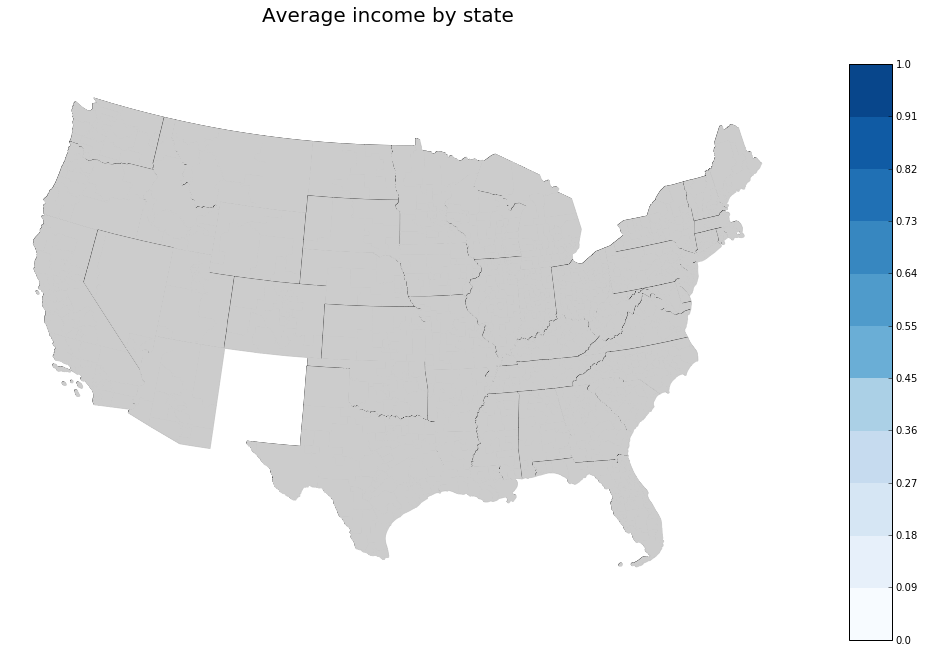

In [87]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, axisbg='w', frame_on=False)
fig.suptitle('Average income by state', fontsize=20)

m = Basemap(width=5000000,height=3500000,
            resolution='l',projection='aea',\
            lat_1=30.,lat_2=50,lon_0=-96,lat_0=38) 

num_colors = 12
cm = plt.get_cmap('Blues')
blues = [cm(1.*i/num_colors) for i in range(num_colors)]

# add colorbar legend
cmap = mpl.colors.ListedColormap(blues)
# define the bins
bounds = np.linspace(0.0, 1.0, num_colors)

# read each states shapefile
averages = []
for key in state_codes.keys():
    m.readshapefile('data/shapefiles/pums/tl_2013_{0}_puma10'.format(key),
                    name='state', drawbounds=True, default_encoding='latin-1')
    print ('a')
    if key in average_incomes:
        print ('b')
        income = average_incomes[key]
        for info, shape in zip(m.state_info, m.state):
            patches = [Polygon(np.array(shape), True)]
            pc = PatchCollection(patches, edgecolor='k', linewidths=1., zorder=2)
            pc.set_color('#cccccc')
            ax.add_collection(pc)

# create a second axes for the colorbar
ax2 = fig.add_axes([0.82, 0.1, 0.03, 0.8])
cb = mpl.colorbar.ColorbarBase(ax2, cmap=cmap, ticks=bounds, boundaries=bounds,
                               format='%1i')
cb.ax.set_yticklabels([str(round(i, 2)) for i in bounds])